# An introduction to plotnine:  graphs that make sense.

A graphics package based on the grammar of graphics.
* Adapted from the `ggplot` package in R.
* Learning the basic concepts makes it easy to make complicated plots by adding layers.
* It is built on top of *matplotlib*, a popular graphing package for Python, but its commands are designed to be consistent with the grammar of graphics.

## Running plotnine in Jupyter Lab

Any Jupyter notebook running plotnine must import the package.

In [1]:
import plotnine as p9

We'll also get some data to practice with--the mpg data set is built into plotnine.data, but you can use pandas to import any other data frame.

In [2]:
from plotnine.data import mpg # data about cars and their fuel efficiency
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


## Components of a plot

All the instructions below will refer to ggplot2, which is the underlying basis of plotnine.

Every ggplot2 plot has three key components:
1. data,
2.  a set of aesthetic mappings between variables in the data and how those variables are displayed visually
3.  At least one layer which describes how to render the variables in a plot.

<div>
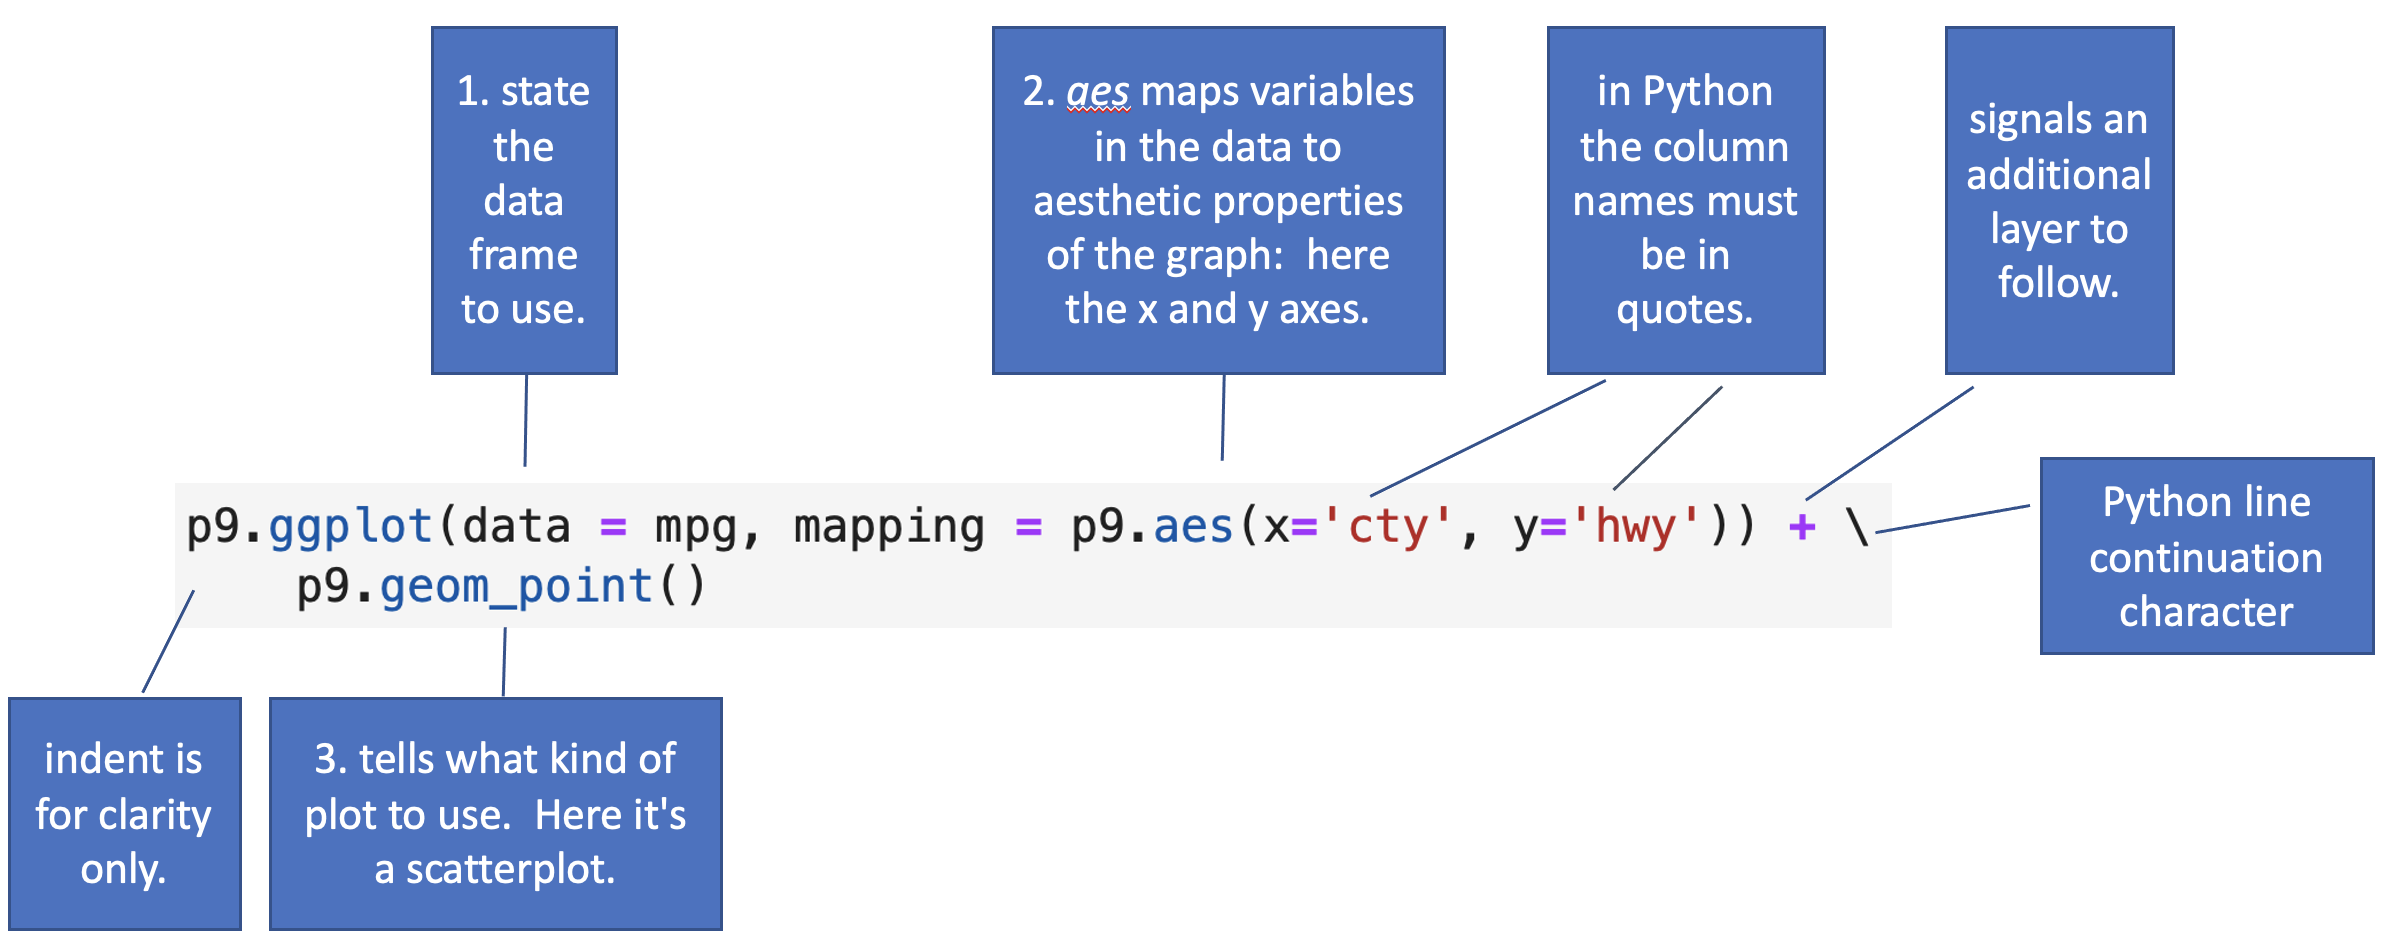
</div>

The commands above make a scatterplot of the columns 'cty' (miles per gallon in the city) vs. 'hwy' (miles per gallon on the highway).  Run the cell below to see this.  'cty' is mapped to the x-axis, and 'hwy' is mapped to the y-axis.

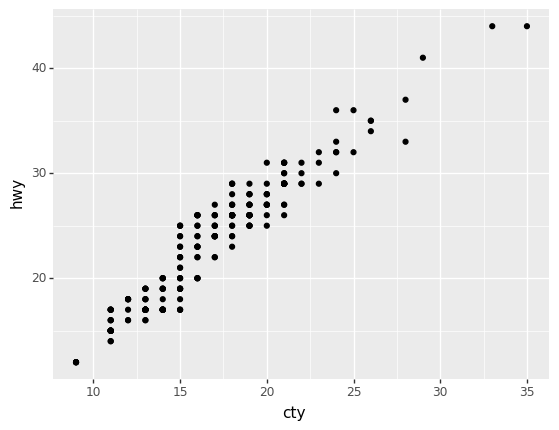

<ggplot: (8765595966038)>

In [3]:
p9.ggplot(data = mpg, mapping = p9.aes(x='cty', y='hwy')) + \
    p9.geom_point()    

### Adding information from more variables to the plot

#### Color

Let's say we now wanted to identify the points on the graph by the class of car it is:  compact, midsize, etc.  We can map the variable 'class' to another aesthetic attribute, in this case color.

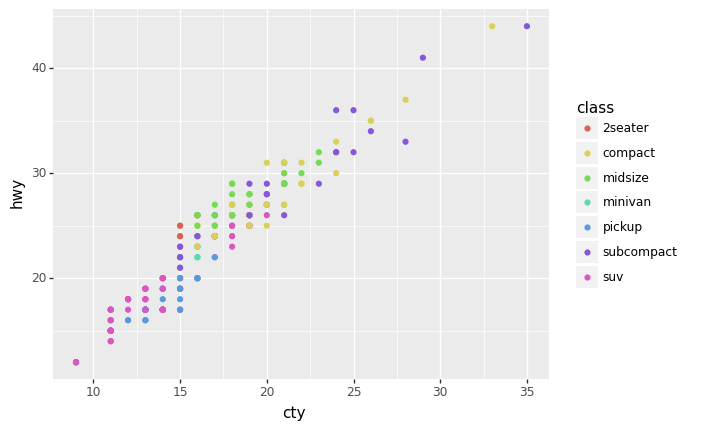

<ggplot: (8765587443055)>

In [4]:
p9.ggplot(data = mpg, mapping = p9.aes(x='cty', y='hwy', color = 'class')) + \
    p9.geom_point()

Color can also be mapped to a continuous variable, like 'displ' (engine displacement).  Notice the difference in the scale.

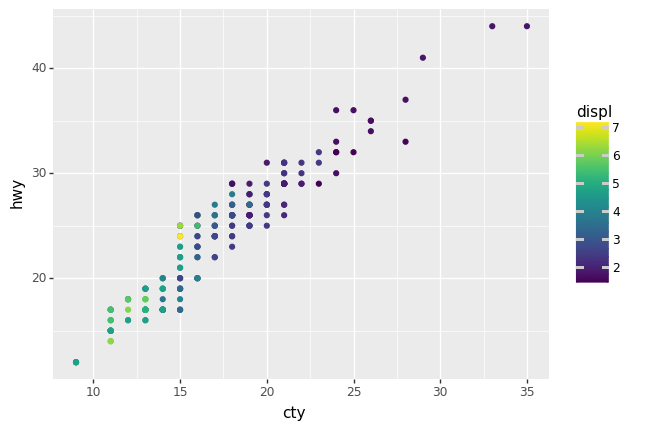

<ggplot: (8765587372483)>

In [5]:
p9.ggplot(data = mpg, mapping = p9.aes(x='cty', y='hwy', color = 'displ')) + \
    p9.geom_point()

#### Size

You can map the size of a point to a continuous variable.  (It's not generally recommended for categorical variables.)

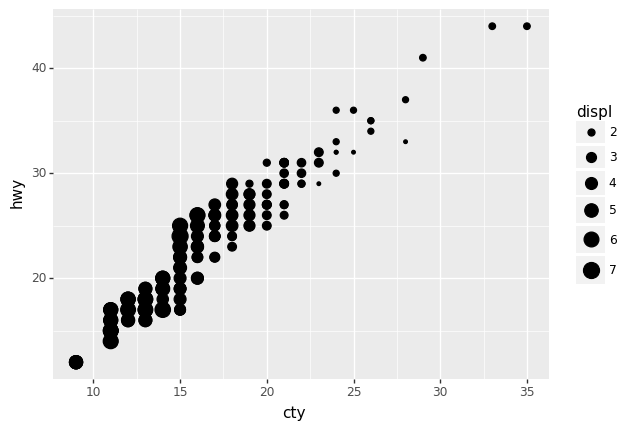

<ggplot: (8765587287839)>

In [6]:
p9.ggplot(data = mpg, mapping = p9.aes(x='cty', y='hwy', size = 'displ')) + \
    p9.geom_point()

#### Shape

Mapping the shape of a point to a variable should generally only be used for nominal categorical variables.

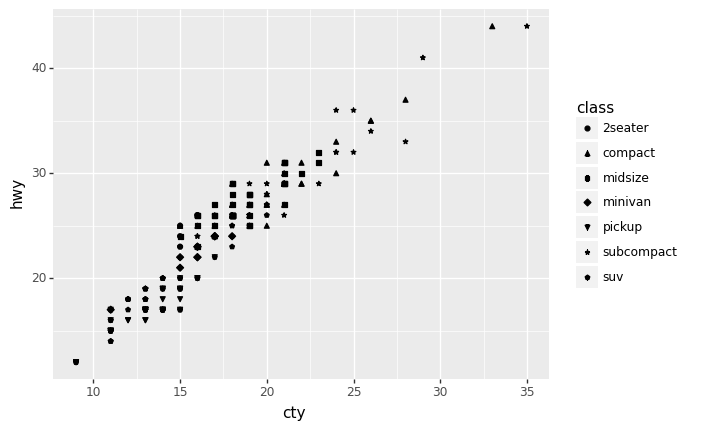

<ggplot: (8765587344955)>

In [7]:
p9.ggplot(data = mpg, mapping = p9.aes(x='cty', y='hwy', shape = 'class')) + \
    p9.geom_point()    

#### Forcing a variable to be treated as a categorical variable

Python will automatically interpret the variable 'year' as a numeric variable.  But if we'd like to treat it as a categorical variable we can use `factor(year)`.

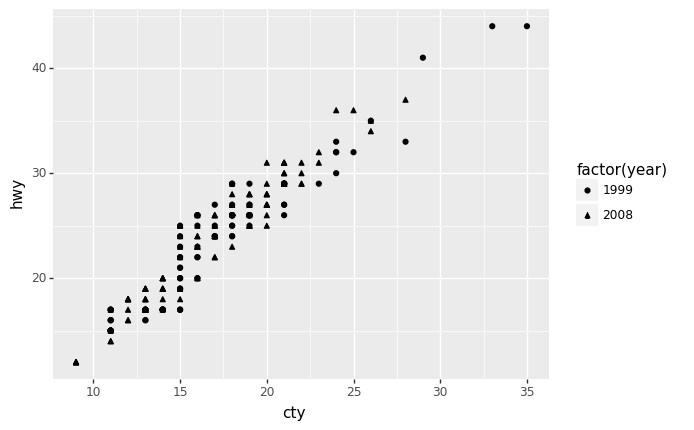

<ggplot: (8765587270164)>

In [8]:
p9.ggplot(data = mpg, mapping = p9.aes(x='cty', y='hwy', shape = 'factor(year)')) + \
    p9.geom_point()    

### Additional layers

To overlay a linear line of best fit you can add the layer with the line to the graph.  Add a line continuation character (backslash) after each +.

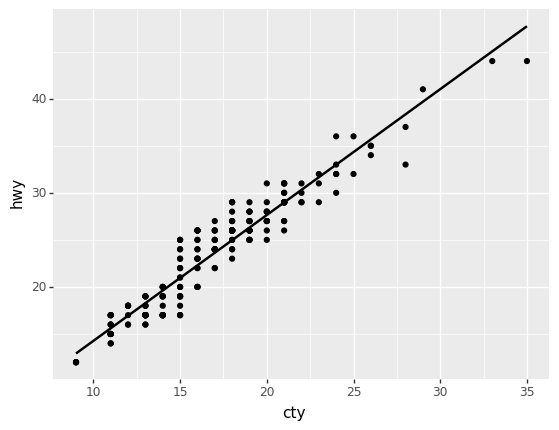

<ggplot: (8765587163464)>

In [9]:
p9.ggplot(data = mpg, mapping = p9.aes(x='cty', y='hwy')) + \
    p9.geom_point() + \
    p9.geom_smooth(method = 'lm', se = False)  # method = 'lm' says to use linear regression; se = False will remove confidence band

## Non-scatterplot graphs for numeric variables

### Histograms

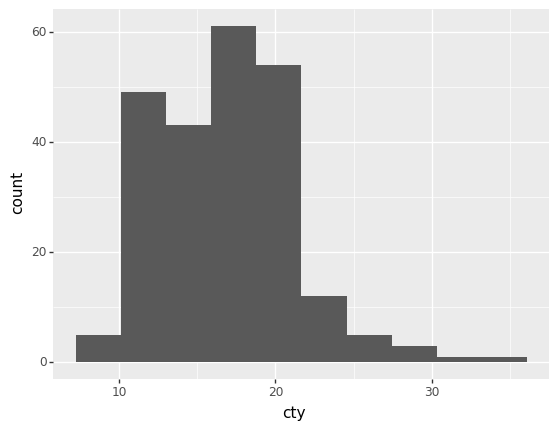

<ggplot: (8765587106168)>

In [10]:
p9.ggplot(data = mpg, mapping = p9.aes(x='cty')) + \
    p9.geom_histogram(bins = 10)

### Side-by-side boxplots

The variable that defines the groups must be a categorical variable.

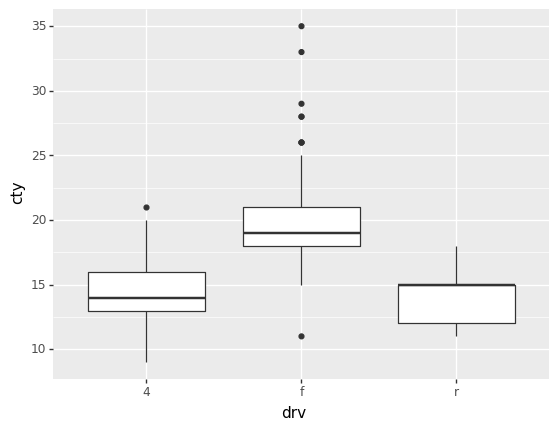

<ggplot: (8765587146837)>

In [11]:
p9.ggplot(data = mpg, mapping = p9.aes(x='drv', y='cty')) + \
    p9.geom_boxplot()

## Graphs for categorical variables

### Bar charts

Bar charts are for categorical variables.  If you use a numeric variable instead it will automatically convert your numeric variable to a categorical one.


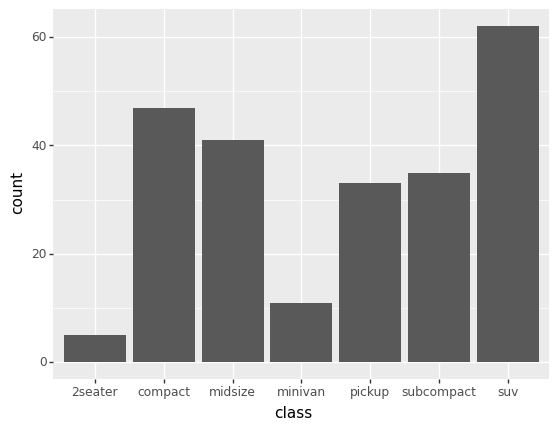

<ggplot: (8765587199334)>

In [12]:
p9.ggplot(data = mpg, mapping = p9.aes(x='class')) + \
    p9.geom_bar()

#### Two-variable bar charts

You can also specify a second variable in a bar chart using the `fill` aesthetic.  Here the fill variable is 'fl', or fuel type.

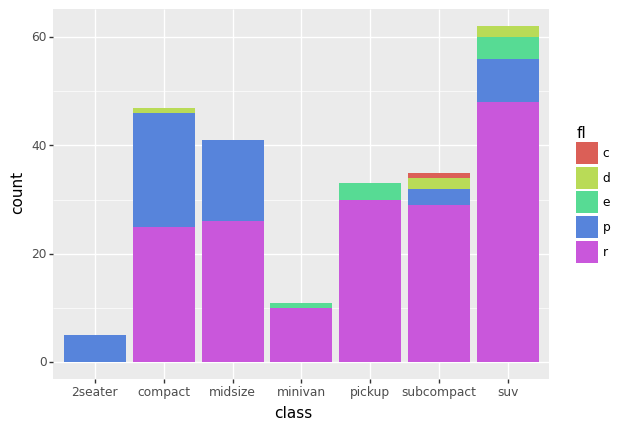

<ggplot: (8765587279710)>

In [13]:
p9.ggplot(data = mpg, mapping = p9.aes(x='class', fill = 'fl')) + \
    p9.geom_bar()

#### Two-variable standardized bar charts

To make each bar 100%, add the parameter `position = "fill"` to your geom_bar() command (remember that from Business Stats?).

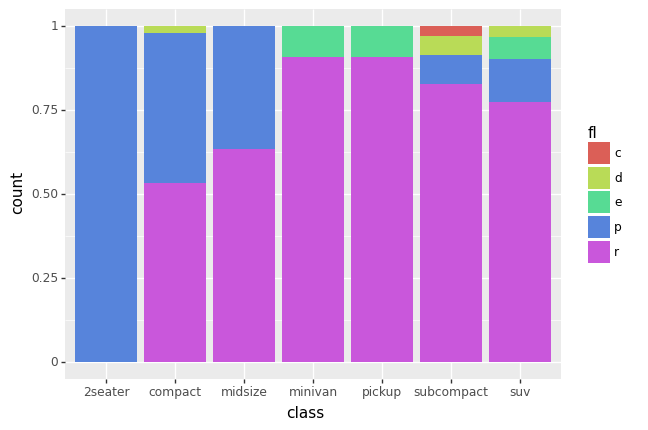

<ggplot: (8765587443229)>

In [14]:
p9.ggplot(data = mpg, mapping = p9.aes(x='class', fill = 'fl')) + \
    p9.geom_bar(position = "fill")

## Add titles and axis labels

Add `p9.labs` as a layer to your graph.  You can add a title, or you can add a label for any aesthetic mapping that you used in the graph.

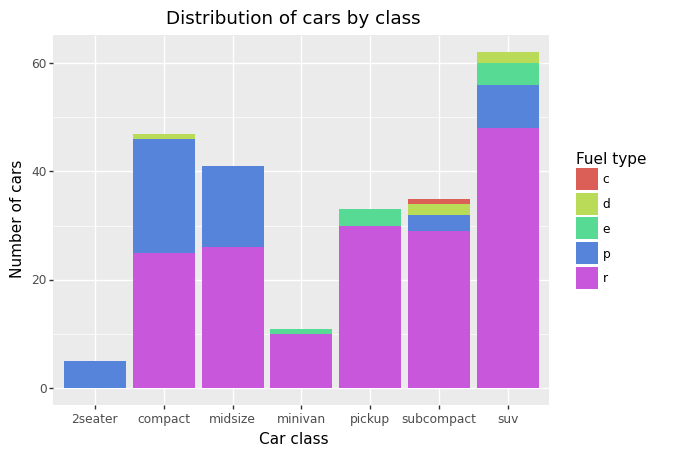

<ggplot: (8765587082234)>

In [ ]:
p9.ggplot(data = mpg, mapping = p9.aes(x='class', fill = 'fl')) + \
    p9.geom_bar() +\
    p9.labs(x = "Car class", y = "Number of cars", fill = 'Fuel type', \
            title = "Distribution of cars by class")

#### There is A LOT more you can do with plotnine. Click the link below to read the documentation:

https://plotnine.readthedocs.io/en/stable/api.html